*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*
 
# Laboratorio 2
**Curso:** MA4703-1 Control Óptimo: Teoría y Laboratorio  
**Profesor:** Héctor Ramírez C.  
**Auxiliares:** Javier Madariaga R. y Pablo Araya Z.   
**Alumno:** Diego Dominguez - Daniel Minaya

In [1]:
#import pyplane.app as pp
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from control import ctrb, obsv, gram, StateSpace, lqr, place

## Pregunta 1

Notemos que $\vec P(t)=m(t)\vec V(t)=m(t)\begin{pmatrix}\dot x(t)\\ \dot y(t)\end{pmatrix}$, luego:

$$\frac{d\vec P}{dt}=m(t) \begin{pmatrix}\ddot x(t)\\ \ddot y(t)\end{pmatrix}+\dot m(t)\begin{pmatrix}\dot x(t)\\ \dot y(t)\end{pmatrix}$$

Por lo tanto tenemos una dinámica de orden 2, por lo que debemos introducir nuevas variables. Definamos:

$$x_1=x,\quad x_2=\dot x,\quad x_3=y,\quad x_4=\dot y$$

Como $\vec F_{ext}=\vec G(x,y)$, entonces de la segunda ley de Newton $\frac{d\vec P}{dt}=\vec F_{ext}$ obtenemos que:

\begin{align}
&\dot x_1 = x_2\\
&m(t)\dot x_2 + m'(t)x_2=G_1(x,y)\\
&\dot x_3 = x_4\\
&m(t)\dot x_4 + m'(t)x_4=G_2(x,y)
\end{align}

donde podemos escribir $$\vec X'(t)=A(t)\vec X(t)+\tilde G(\vec X(t))$$
 
con $$\vec X(t)=\begin{pmatrix}x_1(t)\\x_2(t)\\x_3(t)\\x_4(t)\end{pmatrix},\quad A(t)=\begin{pmatrix}0&1&0&0\\0&-\frac{\dot m(t)}{m(t)}&0&0\\ 0&1&0&0\\0&0&0&-\frac{\dot m(t)}{m(t)}\end{pmatrix},\quad \tilde G(\vec X)=\begin{pmatrix}0\\ \frac{G_1(x_1,x_3)}{m(t)}\\0\\ \frac{G_2(x_1,x_3)}{m(t)}\end{pmatrix}$$

## Pregunta 2

### Parte a)
Graficamos los diagramas de fase para distintos valores de $a,b,c,d$

<div class="row">
  <div class="col-md-7" markdown="1">
  <img src="ejercicio2_1_pp.PNG" style="width:400px;height:400px"/> 
  </div>
  <div class="col-md-0" markdown="1">
  <img src="ejercicio2_2_pp.PNG" style="width:400px;height:400px"/>
  </div>
</div>

<div class="row">
  <div class="col-md-7" markdown="1">
  <img src="ejercicio2_3_pp.PNG" style="width:400px;height:400px"/>
  </div>
  <div class="col-md-0" markdown="1">
  <img src="ejercicio2_4_pp.PNG" style="width:400px;height:400px"/>
  </div>
</div>

Ahora estamos suponiendo que $\tilde G(\vec X)$ es lineal, de hecho:

$$\tilde G(\vec X) = \begin{pmatrix}0\\ (ax_1(t)+bx_3(t))/m(t)\\0\\(cx_1(t)+dx_3(t))/m(t) \end{pmatrix}=\begin{pmatrix}0 & 0 & 0 &0\\ a/m(t)&0&b/m(t)&0\\0 & 0 & 0 &0\\ c/m(t)&0&d/m(t)&0\end{pmatrix}\begin{pmatrix}x_1\\ x_2\\ x_3\\ x_4\end{pmatrix}=R(t)\vec X(t)$$

De esta forma, tenemos un modelo de la forma $$\vec X'(t)=F(t,\vec X)=\tilde A(t)\vec X(t)$$ donde

$$\tilde A(t)=A(t)+ R(t)$$

### Parte b)
Tenemos que el control dado por el motor produce cambios de aceleración tanto vertical como horizontal, luego aparecen en las ecuaciones asociadas a $x_2$ y $x_4$, es decir, nuestro sistema ahora está dado por:

\begin{align}
&\dot x_1(t) = x_2(t)\\
&\dot x_2(t) = \left(\frac{ax_1(t)+bx_3(t)-m'(t)x_2(t)}{m(t)}\right)+u(t)\\
&\dot x_3(t) = x_4\\
&\dot x_4(t) = \left(\frac{cx_1(t)+dx_3(t)-m'(t)x_4(t)}{m(t)}\right)+v(t)
\end{align}

donde podemos escribir 

$$\vec X'(t)=\tilde A(t)\vec X(t)+B\vec U(t)$$

con 

$$B=\begin{pmatrix}0 & 0\\ 1&0\\0 & 0 \\ 0&1\end{pmatrix},\quad \vec U(t)=\begin{pmatrix}u(t)\\v(t)\end{pmatrix}$$

## Ejercicio 3
Ahora consideraremos masa constante, es decir, $m(t)=m>0,\forall t\geq 0$

In [2]:
#Definimos el intervalo de tiempo
intervalo = (0, 10)

#Definimos los parámetros y la masa
a = [-1, -1]
b = [-2, 0]
c = [4, 4] 
d = [-5, -1]
m = 1

#Definimos la matriz R para cada caso
R = []
for i in range(len(a)):
    R.append(np.array([[0, 0, 0, 0],
                       [a[i]/m, 0, b[i]/m, 0],
                       [0, 0, 0, 0],
                       [c[i]/m, 0, d[i]/m, 0]]))

#Definimos la matriz A
A = np.array([[0, 1, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 1],
              [0, 0, 0, 0]])

#Definimos la matriz A_tilde para cada elección de parámetros a,b,c,d
A_tilde = []
for i in range(len(a)):
    A_tilde.append(A + R[i])

#Definimos la matriz B
B = np.array([[0, 0],
              [1, 0],
              [0, 0],
              [0, 1]])

#Definimos los controles
control = {'u1': lambda t: (0.2, 0.2), #constante
           'u2': lambda t: (np.sin(t), np.cos(t)), #Sinosuidal
           'u3': lambda t: (1,-1) if (np.ceil(t)%2)==1 else (0,0), #bang-bang
           'u4': lambda t: np.array([[1, 1, 1, 1], [1, 1, 1, 1]])@t, #feedback
           'u5': lambda t: (np.exp(t), np.exp(-t)*np.cos(t))}  #otro

def get_trajectories(x1_0, x2_0, x3_0, x4_0):
    solucion = {}
    #Resolvemos para cada control
    for c in control.keys():
        #Definimos el sistema
        def sistema1(t, x):
            if c=='u4': 
                return (A_tilde[0] + B@np.array([[1, 0, 0, 0], [0, 0, 1, 0]]))@x
            return A_tilde[0]@x + B@control[c](t)
                
        def sistema2(t, x):
            if c=='u4': 
                return (A_tilde[1] + B@np.array([[1, 0, 0, 0], [0, 0, 1, 0]]))@x
            return A_tilde[1]@x + B@control[c](t)

        #Resolvemos con solve_ivp para cada caso partiendo del mismo punto inicial
        sol1 = solve_ivp(fun = sistema1, 
                    t_span = intervalo, 
                    y0 = [x1_0, x2_0, x3_0, x4_0],
                    dense_output = True)
        sol2 = solve_ivp(fun = sistema2, 
                    t_span = intervalo, 
                    y0 = [x1_0, x2_0, x3_0, x4_0],
                    dense_output = True)
        #Guardamos el resultado
        solucion[c] = [sol1, sol2]
    return solucion

def plot_trajectories(x1_0, x2_0, x3_0, x4_0):
    solucion = get_trajectories(*initial_condition)
    
    names = ['constante','sinusoidal','bang-bang', 'feedback']

    fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(16,5))
    fig.suptitle(f'Trayectorias con condiciones iniciales $(x_0,y_0)=({initial_condition[0]},{initial_condition[2]})$ y $(a,b,c,d)={a[0],b[0],c[0],d[0]}$', fontsize=20, y = 1.05)
    for i, ax in enumerate(axs):
        ax.set_title(f'$u_{i+1}={names[i]}$', fontsize=15)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        t = np.linspace(0,10,100)
        #ax.plot(solucion[f'u{i+1}'][0].y[0], solucion[f'u{i+1}'][0].y[2])
        ax.plot(solucion[f'u{i+1}'][0].sol(t)[0], solucion[f'u{i+1}'][0].sol(t)[2])
        ax.plot(initial_condition[0], initial_condition[2], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="black")
    plt.show()

    fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(16,5))
    fig.suptitle(f'Trayectorias con condiciones iniciales $(x_0,y_0)=({initial_condition[0]},{initial_condition[2]})$ y $(a,b,c,d)={a[1],b[1],c[1],d[1]}$', fontsize=20, y = 1.05)
    for i, ax in enumerate(axs):
        ax.set_title(f'$u_{i+1}={names[i]}$', fontsize=15)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        t = np.linspace(0,10,100)
        #ax.plot(solucion[f'u{i+1}'][1].y[0], solucion[f'u{i+1}'][1].y[2])
        ax.plot(solucion[f'u{i+1}'][1].sol(t)[0], solucion[f'u{i+1}'][1].sol(t)[2])
        ax.plot(initial_condition[0], initial_condition[2], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="black")
    plt.show()

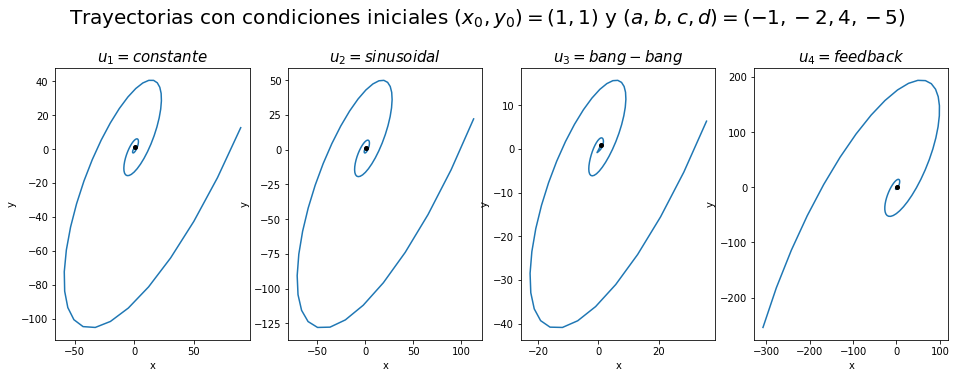

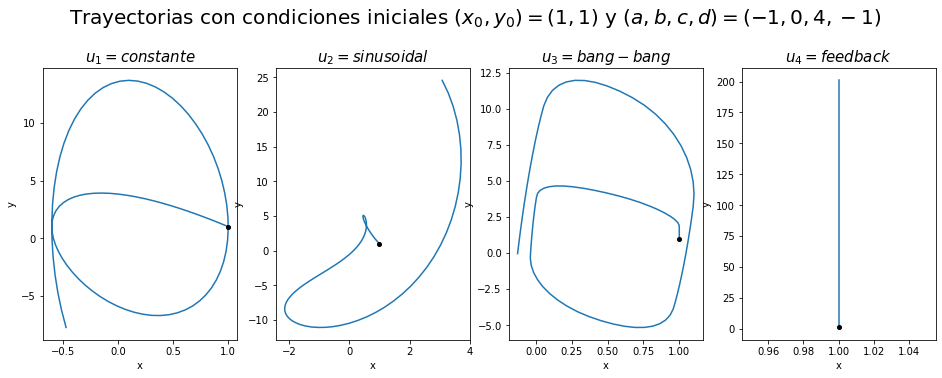

In [3]:
#Definimos condiciones iniciales y ploteamos
initial_condition = (1, 0, 1, 0)
plot_trajectories(*initial_condition)

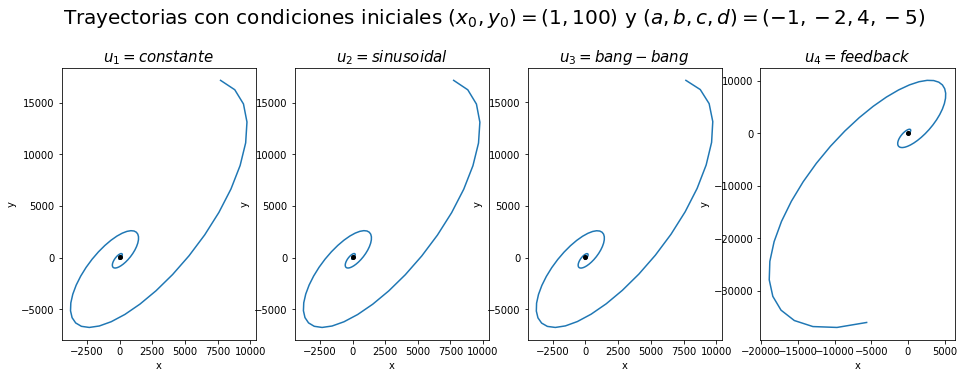

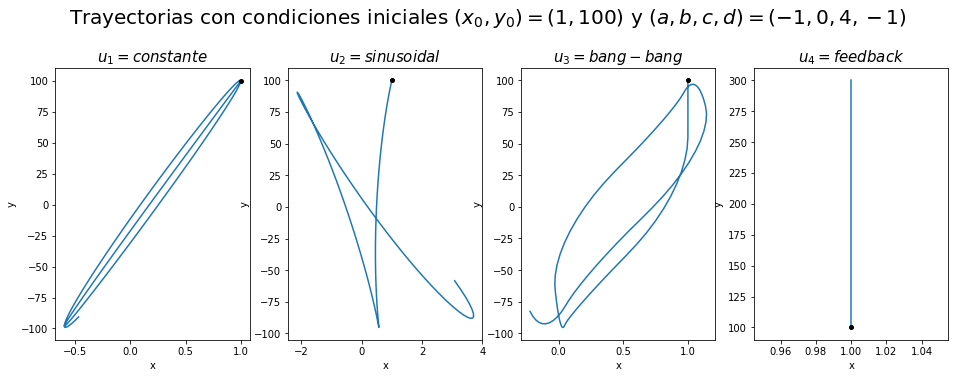

In [4]:
#Definimos condiciones iniciales y ploteamos
initial_condition = (1, 0, 100, 0)
plot_trajectories(*initial_condition)

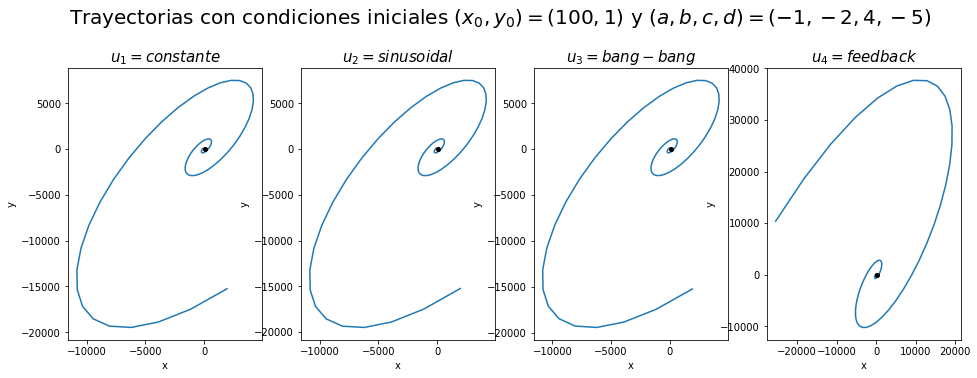

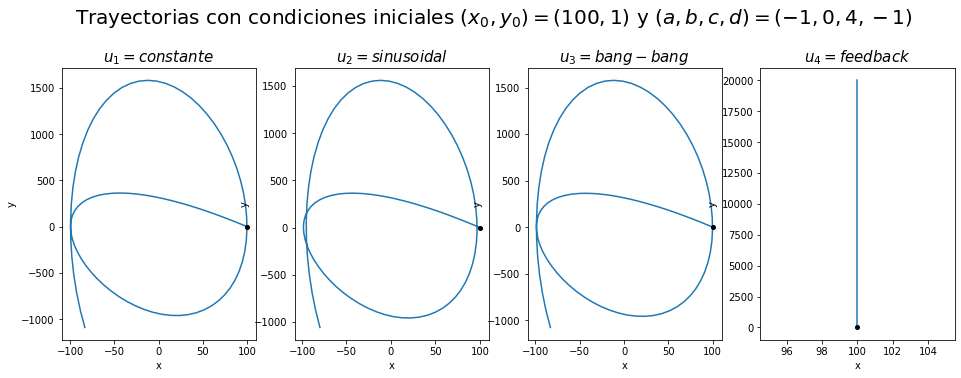

In [5]:
#Definimos condiciones iniciales y ploteamos
initial_condition = (100, 0, 1, 0)
plot_trajectories(*initial_condition)

De manera general, vemos que para cada elección de $a,b,c,d$ las trayectorias tienden a diverger. Para la primera elección de parámetros $a=-1, b=-2, c=4, d=-5$, vemos que sus trayectorias son amplificaciones unas de otras, mientras que para la segunda elección de parámetros encontramos un comportamiento más errático.

Por lo tanto, vemos que la elección de los controles no es suficiente para alcanzar el objetivo planteado que es alcanzar el origen.

## Ejercicio 4
Queremos calcular la matriz de Kalman

$$\text{Kalman}=\begin{bmatrix}B,AB,A^2B,\ldots,A^{n-1}B\end{bmatrix}$$

para determinar la controlabilidad del sistema homogéneo $(A,B)$, donde $n=4$ es la dimensión de la variable de estado. 

In [6]:
Kalman = []
for i in range(2):
    A_tilde2 = A_tilde[i] @ A_tilde[i]
    A_tilde3 = A_tilde2 @ A_tilde[i] 
    Kalman.append(np.block([B, A_tilde[i]@B, A_tilde2@B, A_tilde3@B]))

In [7]:
#Matriz de Kalman para a=-1,b=-2,c=4,d=-5
Kalman[0]

array([[ 0.,  0.,  1.,  0.,  0.,  0., -1., -2.],
       [ 1.,  0.,  0.,  0., -1., -2.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  4., -5.],
       [ 0.,  1.,  0.,  0.,  4., -5.,  0.,  0.]])

In [8]:
#Matriz de Kalman para a=-1,b=0,c=4,d=-1
Kalman[1]

array([[ 0.,  0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 1.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  4., -1.],
       [ 0.,  1.,  0.,  0.,  4., -1.,  0.,  0.]])

In [9]:
ctrb(A_tilde[0],B)

array([[ 0.,  0.,  1.,  0.,  0.,  0., -1., -2.],
       [ 1.,  0.,  0.,  0., -1., -2.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  4., -5.],
       [ 0.,  1.,  0.,  0.,  4., -5.,  0.,  0.]])

In [10]:
ctrb(A_tilde[1],B)

array([[ 0.,  0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 1.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  4., -1.],
       [ 0.,  1.,  0.,  0.,  4., -1.,  0.,  0.]])

Podemos observar que el resultado obtenido por la librería Control es el mismo al que obtuvimos al realizar las multiplicaciones de matrices una por una.

El sistema es controlable porque la matriz de Kalman tiene rango completo, pues basta tomar las primeras cuatro columnas que son linealmente independientes.

## Ejercicio 5
Queremos calcular la matriz de de observabilidad del sistema $(A,B,C)$

$$\mathcal{O}=\begin{bmatrix}C;CA;CA^2,\ldots,CA^{n-1}\end{bmatrix}$$

para determinar la observabilidad del sistema, donde $n=4$ es la dimensión de la variable de estado. 

In [11]:
C=np.array([[1, 0, 0, 0],
            [0, 0, 1, 0]])

Observabilidad = []
for i in range(2):
    A_tilde2 = A_tilde[i] @ A_tilde[i]
    A_tilde3 = A_tilde2 @ A_tilde[i] 
    Observabilidad.append(np.block([[C], [C@A_tilde[i]], [C@A_tilde2], [C@A_tilde3]]))

In [12]:
#Matriz de Observabilidad para a=-1,b=-2,c=4,d=-5
Observabilidad[0]

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-1.,  0., -2.,  0.],
       [ 4.,  0., -5.,  0.],
       [ 0., -1.,  0., -2.],
       [ 0.,  4.,  0., -5.]])

In [13]:
#Matriz de Observabilidad para a=-1,b=0,c=4,d=-1
Observabilidad[1]

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.],
       [ 4.,  0., -1.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  4.,  0., -1.]])

In [14]:
obsv(A_tilde[0], C)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-1.,  0., -2.,  0.],
       [ 4.,  0., -5.,  0.],
       [ 0., -1.,  0., -2.],
       [ 0.,  4.,  0., -5.]])

In [15]:
obsv(A_tilde[1], C)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.],
       [ 4.,  0., -1.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  4.,  0., -1.]])

El sistema es observable porque el sistema $(A^T,C^T)$ es controlable.

## Ejercicio 6

In [16]:
try:
    gram(sys=StateSpace(A_tilde[0], B, C, np.zeros((2,2))), type='of')
except ValueError:
    pass

In [17]:
try:
    gram(sys=StateSpace(A_tilde[1], B, C, np.zeros((2,2))), type='of')
except ValueError:
    pass

El sistema es inestable porque $\tilde A$ tiene algunos valores propios positivos para las dos elecciones de $a,b,c,d$.

In [18]:
#Valores propios con a=-1,b=-2,c=4,d=-5
np.linalg.eig(A_tilde[0])[0]

array([-0.55025052+1.81735402j, -0.55025052-1.81735402j,
        0.55025052+1.81735402j,  0.55025052-1.81735402j])

In [19]:
#Valores propios con a=-1,b=0,c=4,d=-1
np.linalg.eig(A_tilde[1])[0]

array([-1.67036049e-09+1.j, -1.67036049e-09-1.j,  1.67036071e-09+1.j,
        1.67036071e-09-1.j])

## Ejercicio 7

In [20]:
K_lqr = []

sys = StateSpace(A_tilde[0], B, C, np.zeros((2,2)))
Q = np.eye(A_tilde[0].shape[0])
R = np.eye(B.shape[1])
K, S, E = lqr(sys, Q, R)
K_lqr.append(K)

sys = StateSpace(A_tilde[1], B, C, np.zeros((2,2)))
Q = np.eye(A_tilde[1].shape[0])
R = np.eye(B.shape[1])
K, S, E = lqr(sys, Q, R)
K_lqr.append(K)

K_lqr

[array([[ 2.24340784,  2.28940021, -3.01027767, -0.49544159],
        [ 1.26498527, -0.49544159,  0.38324614,  1.23330042]]),
 array([[ 2.83751278,  2.53944595, -0.40326128,  0.47564675],
        [ 2.19071958,  0.47564675,  0.35550003,  1.21850738]])]

In [21]:
#Valores propios de A-BK con a=-1,b=-2,c=4,d=-5 
np.linalg.eig(A_tilde[0]- B @ K_lqr[0])[0]

array([-0.84485072+2.15812617j, -0.84485072-2.15812617j,
       -0.91649959+1.37703873j, -0.91649959-1.37703873j])

In [22]:
#Valores propios de A-BK con a=-1,b=0,c=4,d=-1
np.linalg.eig(A_tilde[1]- B @ K_lqr[1])[0]

array([-0.79983234+1.6061606j , -0.79983234-1.6061606j ,
       -1.07914433+0.47384847j, -1.07914433-0.47384847j])

In [23]:
K_place = []

K_place.append(place(A_tilde[0], B, [-2, -3, -4, -1]))
K_place.append(place(A_tilde[1], B, [-2, -3, -4, -1]))

K_place

[array([[ 6.72093174,  5.88837381, -0.85218432,  0.45912492],
        [ 5.14779945,  0.45911681, -1.72093174,  4.11162619]]),
 array([[6.72093174, 5.88837381, 1.14781568, 0.45912492],
        [5.14779945, 0.45911681, 2.27906826, 4.11162619]])]

In [24]:
#Valores propios de A-BK con a=-1,b=-2,c=4,d=-5 
np.linalg.eig(A_tilde[0]- B @ K_place[0])[0]

array([-4., -1., -2., -3.])

In [25]:
#Valores propios de A-BK con a=-1,b=0,c=4,d=-1
np.linalg.eig(A_tilde[1]- B @ K_place[1])[0]

array([-4., -1., -2., -3.])

Podemos notar que la función place nos entrega una matriz de ganancia $K$ con los valores propios que nosotros queramos, mientras que la función lqr nos entrega una matriz $K$ cuyos valores propios harán que el sistema sea estable.

In [26]:
def get_trajectories_2(x1_0, x2_0, x3_0, x4_0, K):
    def sistema1(t, x):
        return (A_tilde[0] - B @ K[0]) @ x
    
    def sistema2(t, x):
        return (A_tilde[1] - B @ K[1]) @ x

    sol1 = solve_ivp(fun = sistema1, 
                    t_span = intervalo, 
                    y0 = [x1_0, x2_0, x3_0, x4_0],
                    dense_output=True)
    sol2 = solve_ivp(fun = sistema2, 
                    t_span = intervalo, 
                    y0 = [x1_0, x2_0, x3_0, x4_0],
                    dense_output=True)
 
    return [sol1, sol2]

def plot_trajectories_2(x1_0, x2_0, x3_0, x4_0, K_lqr, K_place):
    solucion_lqr = get_trajectories_2(*initial_condition, K_lqr)
    solucion_place = get_trajectories_2(*initial_condition, K_place)
    
    names = ['lqr', 'place']
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(16,5))
    fig.suptitle(f'Trayectorias con condiciones iniciales $(x_0,y_0)=({initial_condition[0]},{initial_condition[2]})$ con $K=lqr$', fontsize=20, y = 1.05)
    for i, ax in enumerate(axs):
        ax.set_title(f'$(a,b,c,d)=({a[i]},{b[i]},{c[i]},{d[i]})$', fontsize=15)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        t = np.linspace(0,10,100)
        ax.plot(solucion_lqr[i].sol(t)[0], solucion_lqr[i].sol(t)[2])
        ax.plot(initial_condition[0], initial_condition[2], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="black")
    plt.show()
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(16,5))
    fig.suptitle(f'Trayectorias con condiciones iniciales $(x_0,y_0)=({initial_condition[0]},{initial_condition[2]})$ con $K=place$', fontsize=20, y = 1.05)
    for i, ax in enumerate(axs):
        ax.set_title(f'$(a,b,c,d)=({a[i]},{b[i]},{c[i]},{d[i]})$', fontsize=15)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        t = np.linspace(0,10,100)
        ax.plot(solucion_place[i].sol(t)[0], solucion_place[i].sol(t)[2])
        ax.plot(initial_condition[0], initial_condition[2], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="black")
    plt.show()

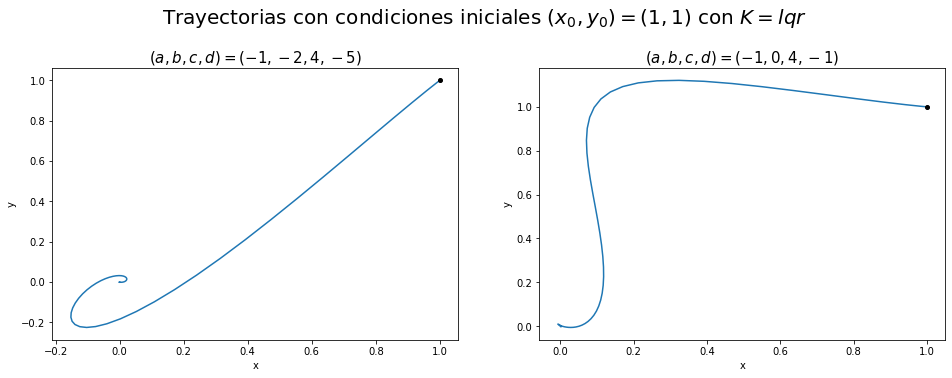

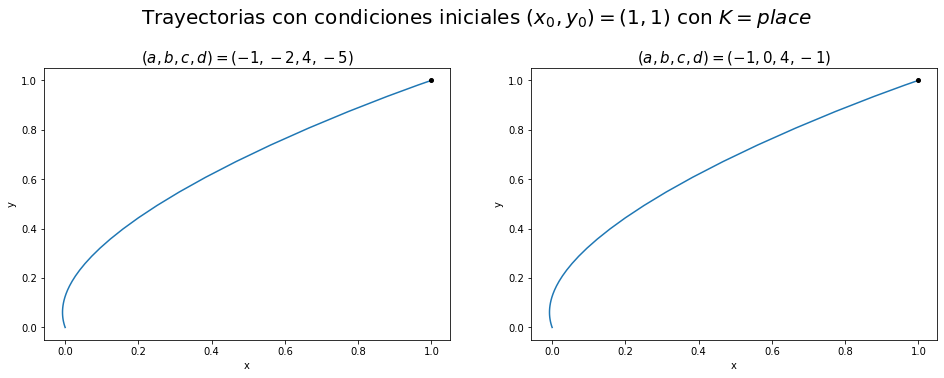

In [27]:
initial_condition = (1, 0, 1, 0)
plot_trajectories_2(*initial_condition, K_lqr, K_place)

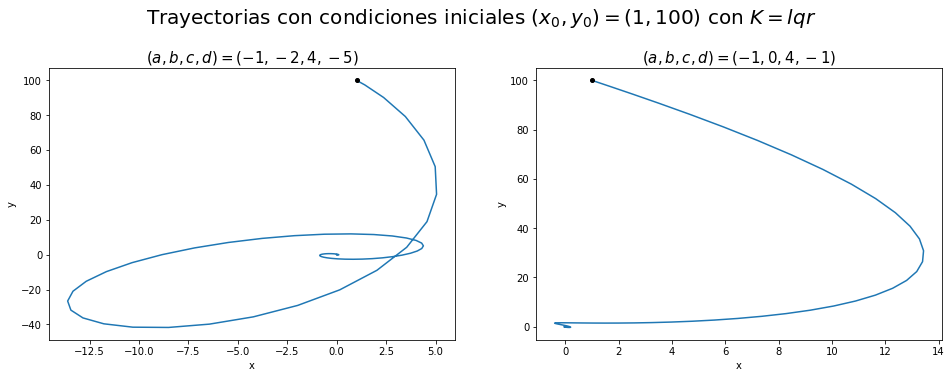

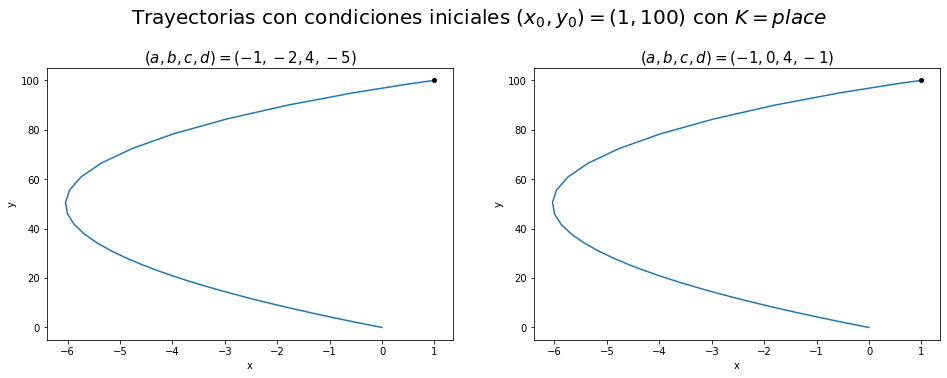

In [28]:
initial_condition = (1, 0, 100, 0)
plot_trajectories_2(*initial_condition, K_lqr, K_place)

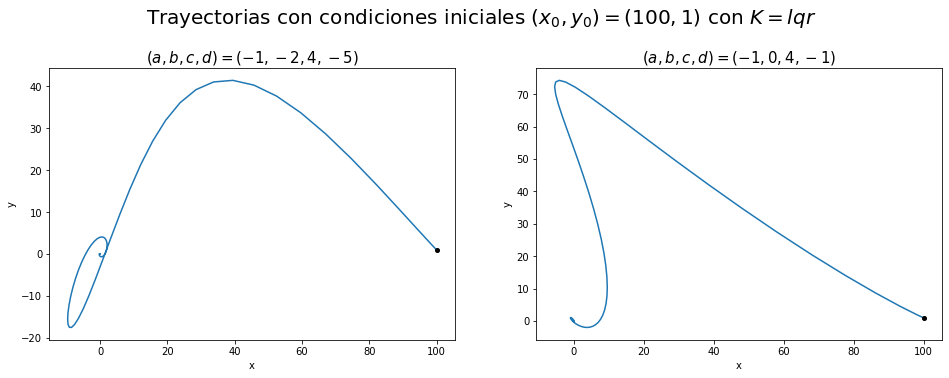

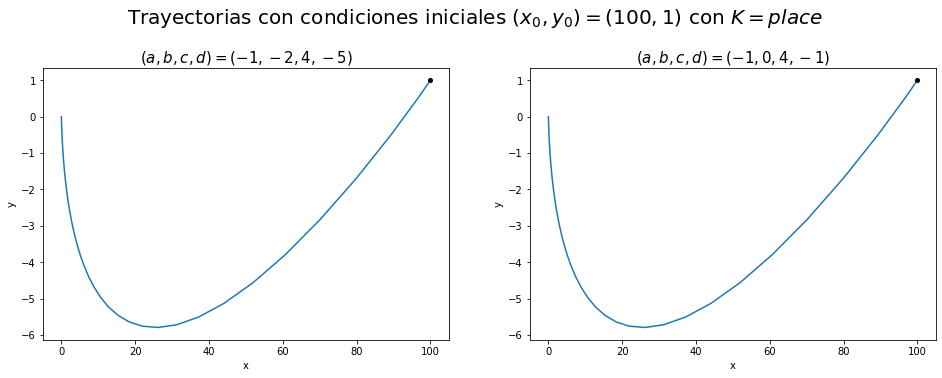

In [29]:
initial_condition = (100, 0, 1, 0)
plot_trajectories_2(*initial_condition, K_lqr, K_place)

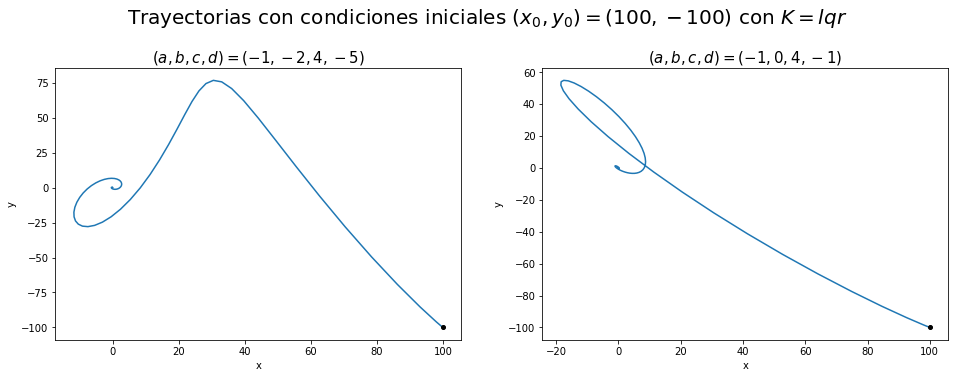

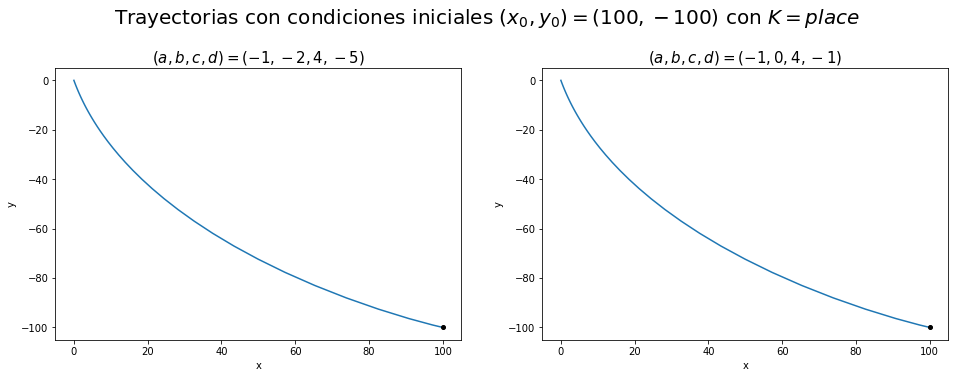

In [30]:
initial_condition = (100, 0, -100, 0)
plot_trajectories_2(*initial_condition, K_lqr, K_place)

Podemos observar que las trayectorias obtenidas al utilizar la matriz $K$ entregada por la función place, tienen un comportamiento asintótico, a diferencia de las matrices $K$ obtenidas por la función lqr, cuyas trayectorias son más variadas representando curvas más estables acorde a la situación que estamos modelando, que es el movimiento de un barco.

## Ejercicio 8

Como solo tenemos acceso a la posición del barco, entonces es natural pensar en la matriz $C=\begin{pmatrix}1&0&0&0\\0&0&1&0\end{pmatrix}$, por lo que $\vec Y=C\vec X=(x_1,x_3)^T$.

Como queremos convergencia asintótica utilizaremos la función place para determinar la mtriz $L$.

In [31]:
L=[]
L.append(place(A_tilde[0].T, C.T, [-2, -3, -4, -1]).T)
L.append(place(A_tilde[1].T, C.T, [-2, -3, -4, -1]).T)
L

[array([[ 5.88837381,  0.45911681],
        [ 6.72093174, -0.85220055],
        [ 0.45912492,  4.11162619],
        [ 5.14781567, -1.72093174]]),
 array([[5.88837381, 0.45911681],
        [6.72093174, 1.14779945],
        [0.45912492, 4.11162619],
        [5.14781567, 2.27906826]])]

In [32]:
def get_trajectories_3(x1_0, x2_0, x3_0, x4_0, solucion):
    solucion_ = {}
    #Resolvemos para cada control
    for c in control.keys():
        #Definimos el sistema
        def sistema1(t, x_):
            x = solucion[c][0].sol(t)
            if c=='u4': 
                return (A_tilde[0] + B@np.array([[1, 0, 0, 0], [0, 0, 1, 0]]))@x_ + L[0] @ (C @ x - C @ x_)
            return A_tilde[0] @ x_ + B @ control[c](t) + L[0] @ (C @ x - C @ x_)
                
        def sistema2(t, x_):
            x = solucion[c][1].sol(t)
            if c=='u4': 
                return (A_tilde[1] + B@np.array([[1, 0, 0, 0], [0, 0, 1, 0]]))@x_ + L[1] @ (C @ x - C @ x_)
            return A_tilde[1] @ x_ + B @ control[c](t) + L[1] @ (C @ x - C @ x_)

        #Resolvemos con solve_ivp para cada caso partiendo del mismo punto inicial
        sol1 = solve_ivp(fun = sistema1, 
                    t_span = intervalo, 
                    y0 = [x1_0, x2_0, x3_0, x4_0],
                    dense_output = True)
        sol2 = solve_ivp(fun = sistema2, 
                    t_span = intervalo, 
                    y0 = [x1_0, x2_0, x3_0, x4_0],
                    dense_output = True)
        #Guardamos el resultado
        solucion_[c] = [sol1, sol2]
    return solucion_

def plot_trajectories_3(x1_0, x2_0, x3_0, x4_0, solucion_):
    names = ['constante','sinusoidal','bang-bang', 'feedback']

    fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(16,5))
    fig.suptitle(f'Trayectorias estimadas con condiciones iniciales $(x_0,y_0)=({initial_condition[0]},{initial_condition[2]})$ y $(a,b,c,d)={a[0],b[0],c[0],d[0]}$', fontsize=20, y = 1.05)
    for i, ax in enumerate(axs):
        ax.set_title(f'$u_{i+1}={names[i]}$', fontsize=15)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        t = np.linspace(0,10,100)
        ax.plot(solucion_[f'u{i+1}'][0].sol(t)[0], solucion_[f'u{i+1}'][0].sol(t)[2])
        ax.plot(initial_condition[0], initial_condition[2], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="black")
    plt.show()

    fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(16,5))
    fig.suptitle(f'Trayectorias estimadas con condiciones iniciales $(x_0,y_0)=({initial_condition[0]},{initial_condition[2]})$ y $(a,b,c,d)={a[1],b[1],c[1],d[1]}$', fontsize=20, y = 1.05)
    for i, ax in enumerate(axs):
        ax.set_title(f'$u_{i+1}={names[i]}$', fontsize=15)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        t = np.linspace(0,10,100)
        ax.plot(solucion_[f'u{i+1}'][1].sol(t)[0], solucion_[f'u{i+1}'][1].sol(t)[2])
        ax.plot(initial_condition[0], initial_condition[2], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="black")
    plt.show()
    
def plot_error1(solucion, solucion_):
    t = np.linspace(0,10,100)
    fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(16,5))
    fig.suptitle(f'Errores para (a,b,c,d)={a[0], b[0], c[0], d[0]}', fontsize=20, y = 1.05)
    names = ['constante','sinusoidal','bang-bang', 'feedback']
    for i, ax in enumerate(axs):
        ax.set_title(f'$u_{i+1}={names[i]}$', fontsize=15)
        ax.set_xlabel('t')
        t = np.linspace(0,10,100)
        ax.plot(t, solucion[f'u{i+1}'][0].sol(t)[0]-solucion_[f'u{i+1}'][0].sol(t)[0], label='x')
        ax.plot(t, solucion[f'u{i+1}'][0].sol(t)[2]-solucion_[f'u{i+1}'][0].sol(t)[2], label='y')
        ax.legend()
    
    fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(16,5))
    fig.suptitle(f'Errores para (a,b,c,d)={a[1], b[1], c[1], d[1]}', fontsize=20, y = 1.05)
    names = ['constante','sinusoidal','bang-bang', 'feedback']
    for i, ax in enumerate(axs):
        ax.set_title(f'$u_{i+1}={names[i]}$', fontsize=15)
        ax.set_xlabel('t')
        t = np.linspace(0,10,100)
        ax.plot(t, solucion[f'u{i+1}'][1].sol(t)[0]-solucion_[f'u{i+1}'][1].sol(t)[0], label='x')
        ax.plot(t, solucion[f'u{i+1}'][1].sol(t)[2]-solucion_[f'u{i+1}'][1].sol(t)[2], label='y')
        ax.legend(shadow=True)

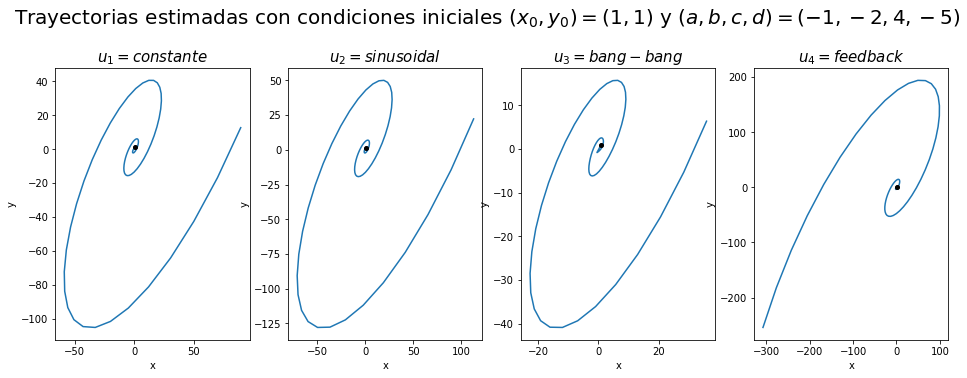

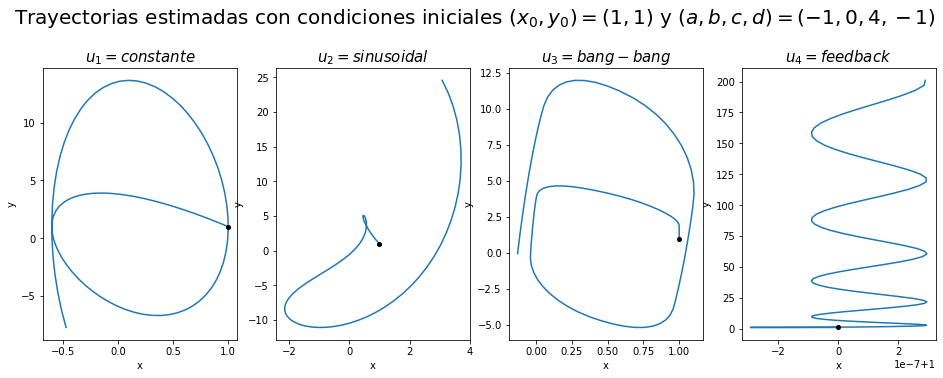

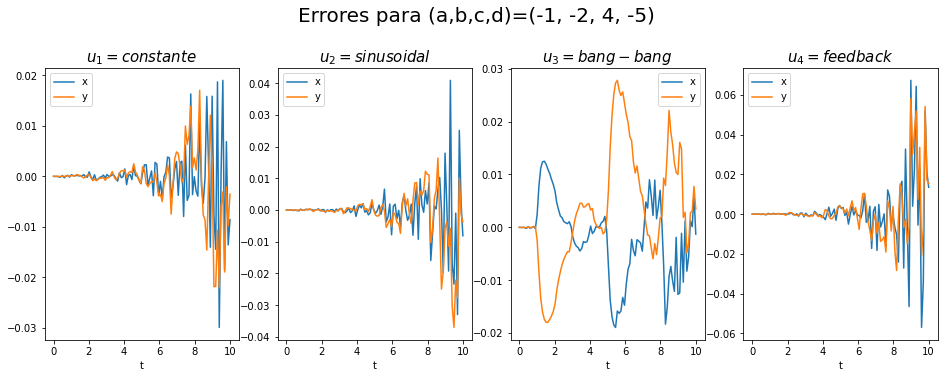

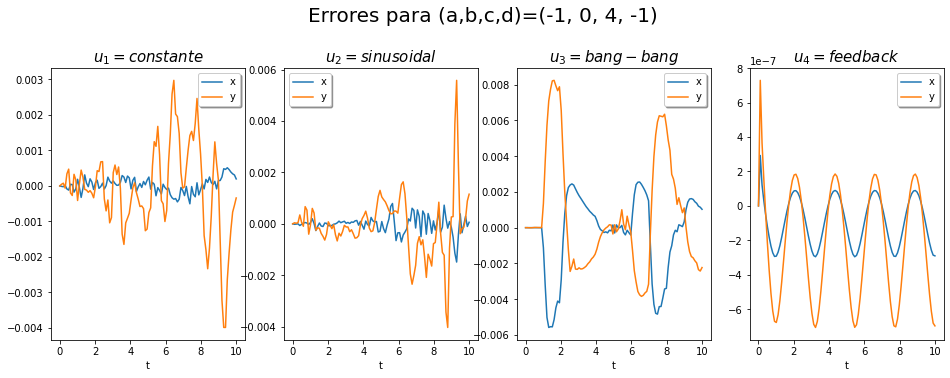

In [33]:
initial_condition = (1, 0, 1, 0)
solucion = get_trajectories(*initial_condition)
solucion_ = get_trajectories_3(*initial_condition, solucion)
plot_trajectories_3(*initial_condition, solucion_)
plot_error1(solucion, solucion_)

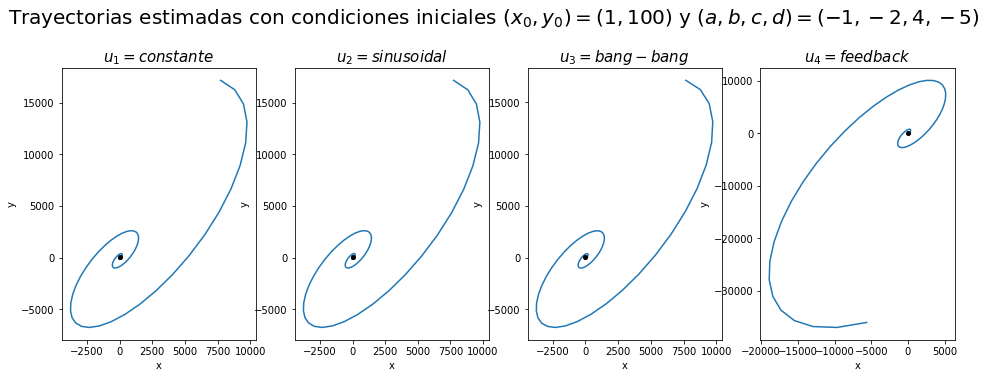

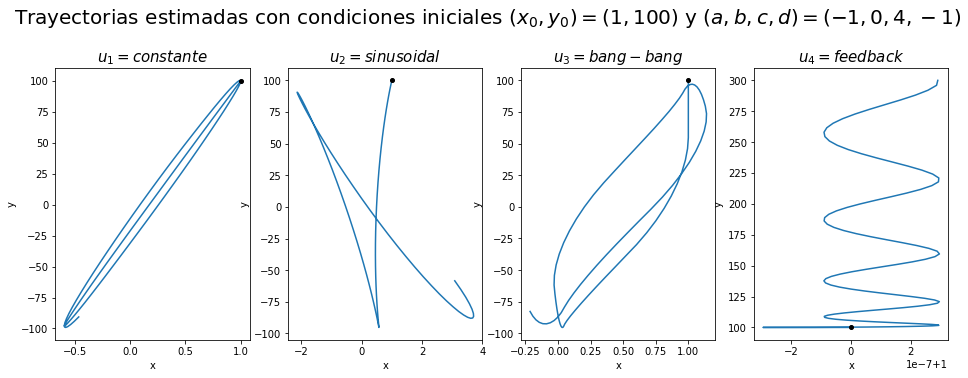

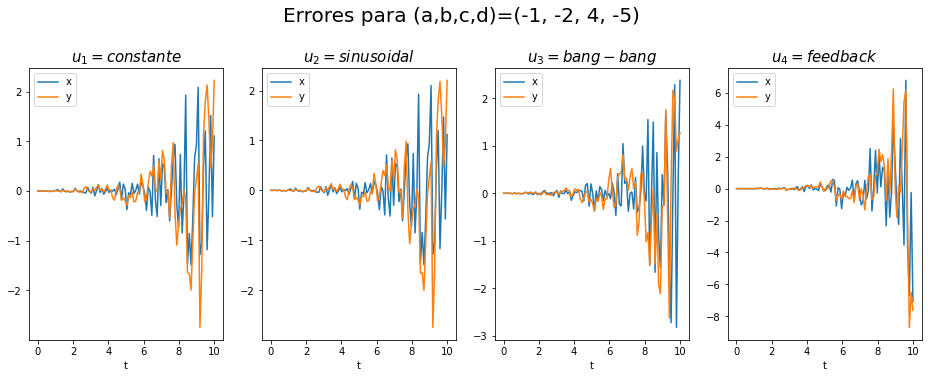

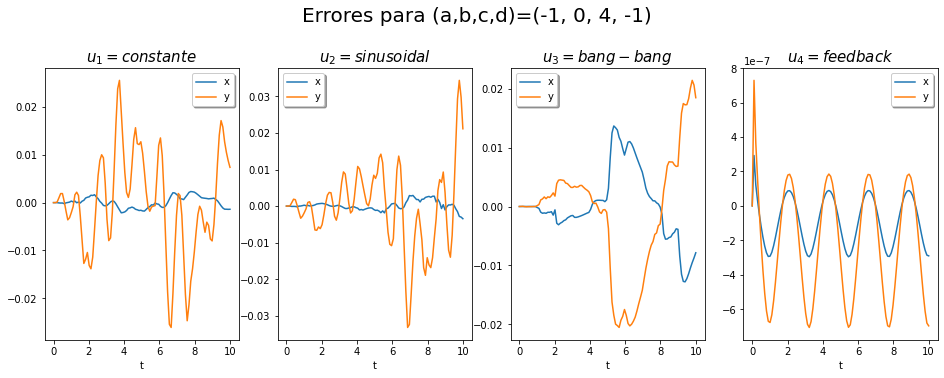

In [34]:
initial_condition = (1, 0, 100, 0)
solucion = get_trajectories(*initial_condition)
solucion_ = get_trajectories_3(*initial_condition, solucion)
plot_trajectories_3(*initial_condition, solucion_)
plot_error1(solucion, solucion_)

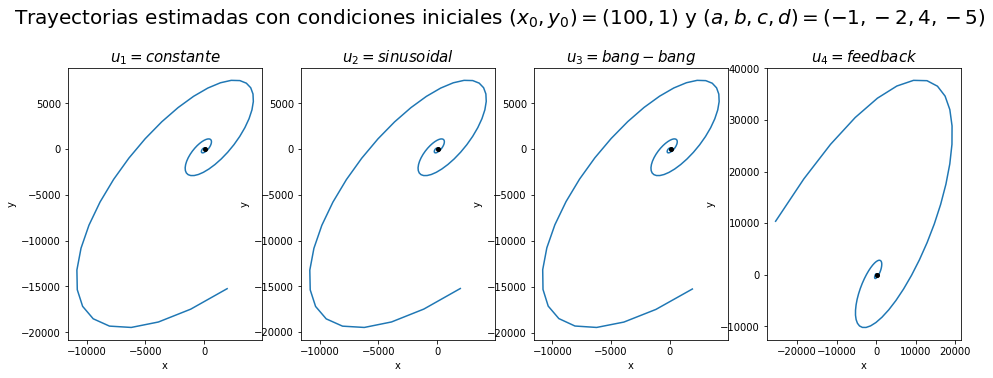

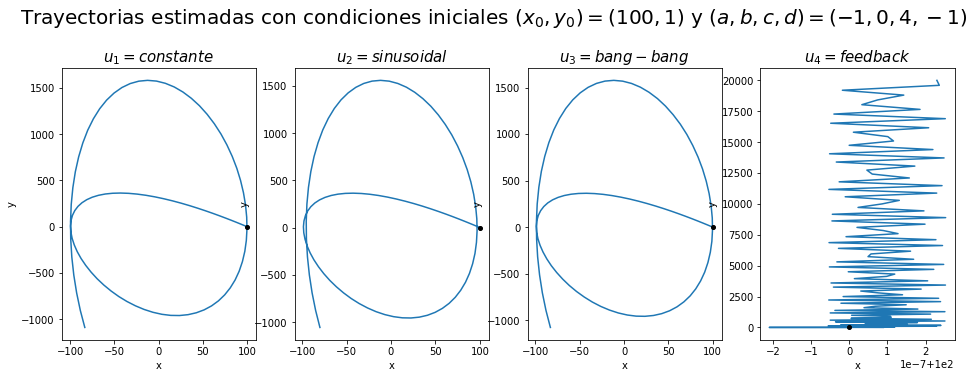

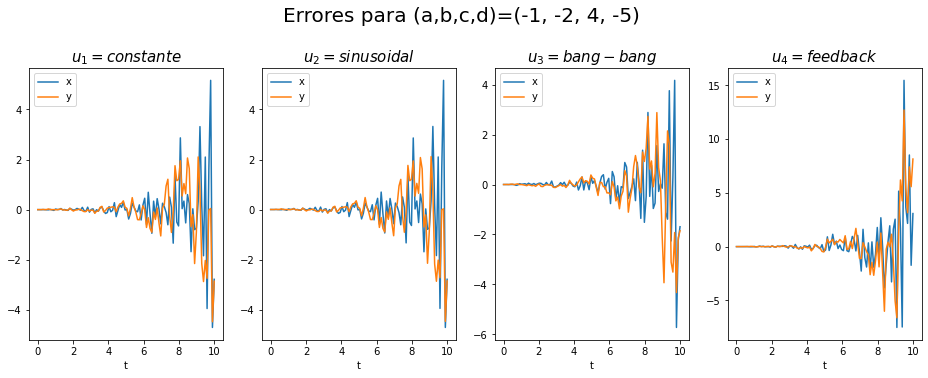

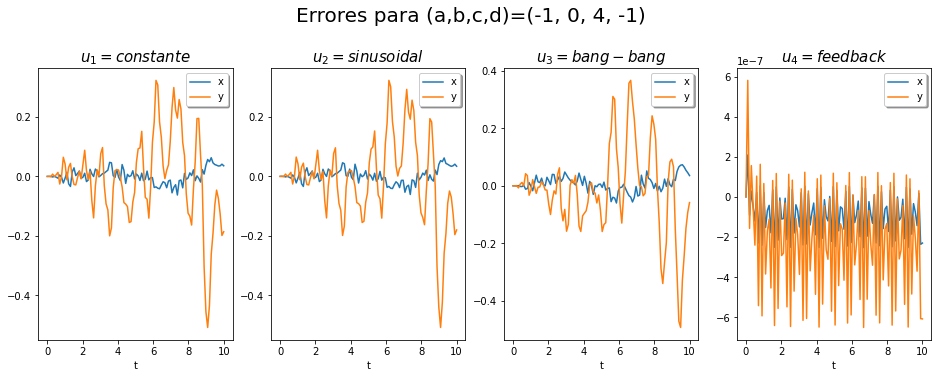

In [35]:
initial_condition = (100, 0, 1, 0)
solucion = get_trajectories(*initial_condition)
solucion_ = get_trajectories_3(*initial_condition, solucion)
plot_trajectories_3(*initial_condition, solucion_)
plot_error1(solucion, solucion_)

In [36]:
def get_trajectories_4(x1_0, x2_0, x3_0, x4_0, K, solucion):
    def sistema1(t, x_):
        x = solucion[0].sol(t)
        return (A_tilde[0] - B @ K[0]) @ x_ + L[0] @ (C @ x - C @ x_)
    
    def sistema2(t, x_):
        x = solucion[0].sol(t)
        return (A_tilde[1] - B @ K[1]) @ x_ + L[1] @ (C @ x - C @ x_)

    sol1 = solve_ivp(fun = sistema1, 
                    t_span = intervalo, 
                    y0 = [x1_0, x2_0, x3_0, x4_0],
                    dense_output=True)
    sol2 = solve_ivp(fun = sistema2, 
                    t_span = intervalo, 
                    y0 = [x1_0, x2_0, x3_0, x4_0],
                    dense_output=True)
 
    return [sol1, sol2]

def plot_trajectories_4(x1_0, x2_0, x3_0, x4_0, solucion_):
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(16,5))
    fig.suptitle(f'Trayectorias estimadas con condiciones iniciales $(x_0,y_0)=({initial_condition[0]},{initial_condition[2]})$ con $K=place$', fontsize=20, y = 1.05)
    for i, ax in enumerate(axs):
        ax.set_title(f'$(a,b,c,d)=({a[i]},{b[i]},{c[i]},{d[i]})$', fontsize=15)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        t = np.linspace(0,10,100)
        ax.plot(solucion_[i].sol(t)[0], solucion_[i].sol(t)[2])
        ax.plot(initial_condition[0], initial_condition[2], marker="o", markersize=4, markeredgecolor="black", markerfacecolor="black")
    plt.show()
    
def plot_error2(solucion, solucion_):
    t = np.linspace(0,10,100)
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(16,5))
    fig.suptitle(f'Errores ', fontsize=20, y = 1.05)
    for i, ax in enumerate(axs):
        ax.set_title(f'$(a,b,c,d)=({a[i]},{b[i]},{c[i]},{d[i]})$', fontsize=15)
        ax.set_xlabel('t')
        t = np.linspace(0,10,100)
        ax.plot(t, solucion[i].sol(t)[0]-solucion_[i].sol(t)[0], label='x')
        ax.plot(t, solucion[i].sol(t)[2]-solucion_[i].sol(t)[2], label='y')
        ax.legend(shadow=True) 

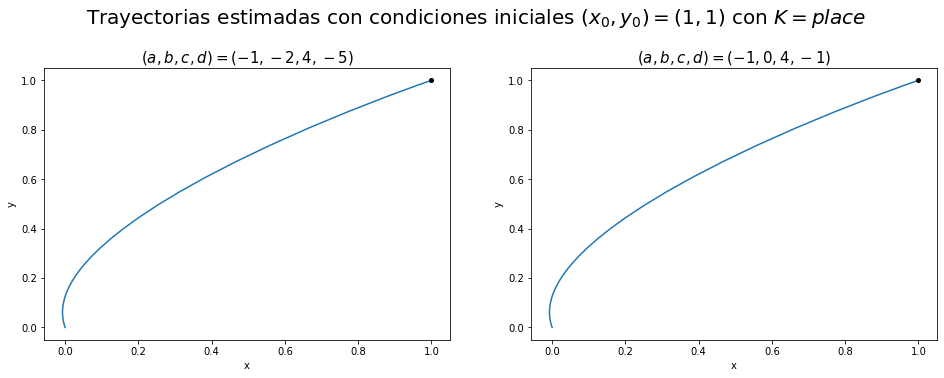

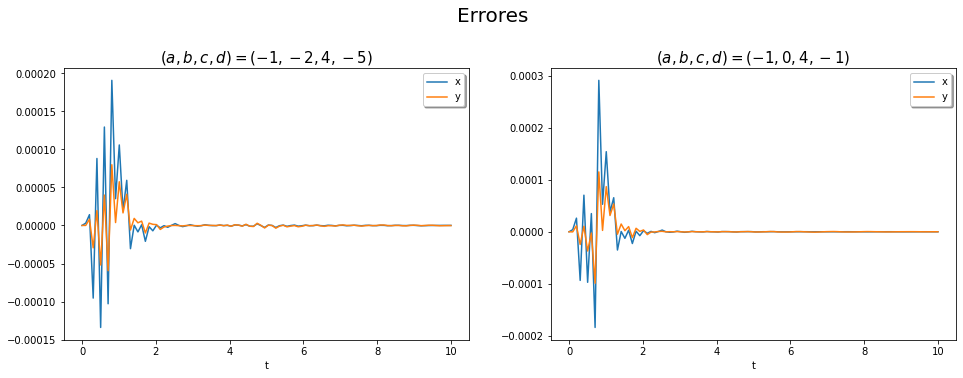

In [37]:
initial_condition = (1, 0, 1, 0)
solucion = get_trajectories_2(*initial_condition, K_place)
solucion_ = get_trajectories_4(*initial_condition, K_place, solucion)
plot_trajectories_4(*initial_condition, solucion_)
plot_error2(solucion, solucion_)

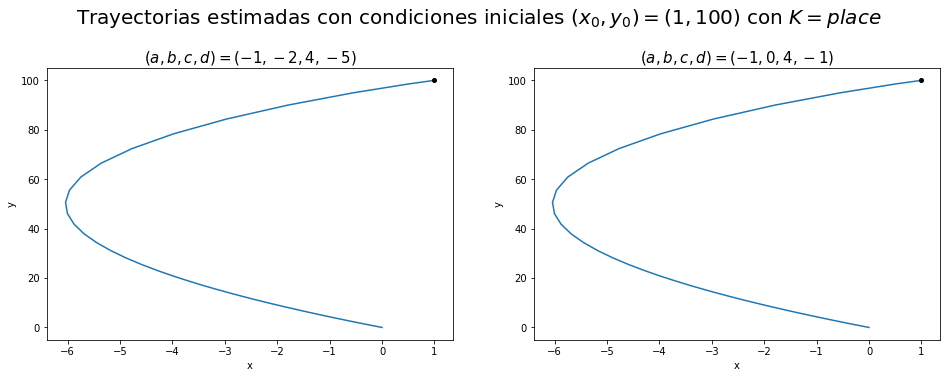

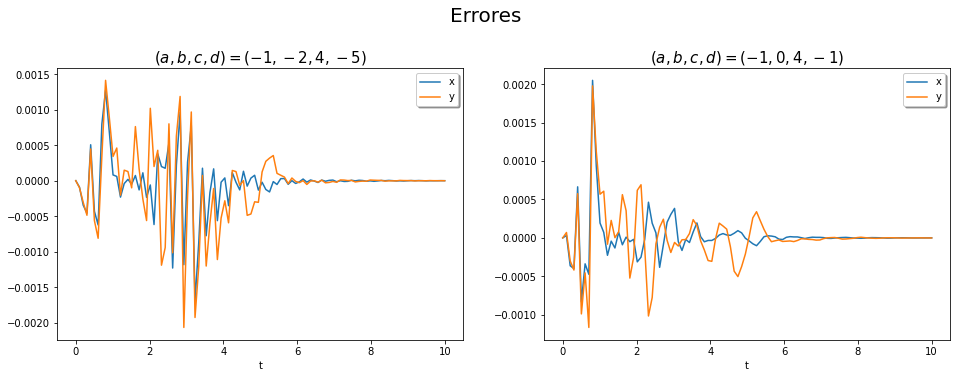

In [38]:
initial_condition = (1, 0, 100, 0)
solucion = get_trajectories_2(*initial_condition, K_place)
solucion_ = get_trajectories_4(*initial_condition, K_place, solucion)
plot_trajectories_4(*initial_condition, solucion_)
plot_error2(solucion, solucion_)

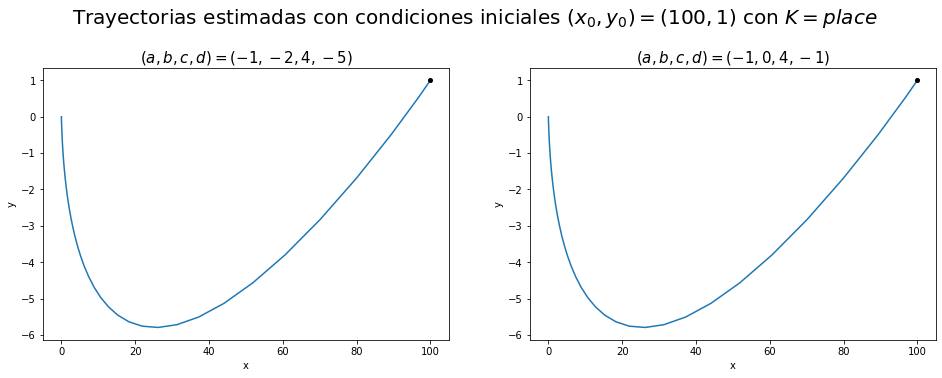

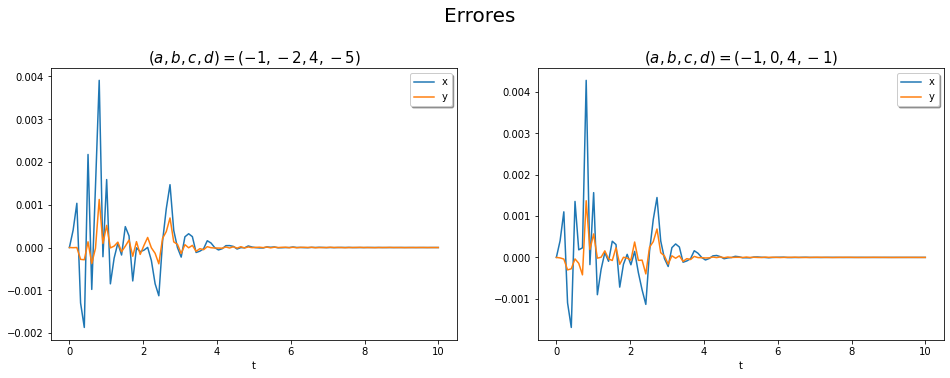

In [39]:
initial_condition = (100, 0, 1, 0)
solucion = get_trajectories_2(*initial_condition, K_place)
solucion_ = get_trajectories_4(*initial_condition, K_place, solucion)
plot_trajectories_4(*initial_condition, solucion_)
plot_error2(solucion, solucion_)

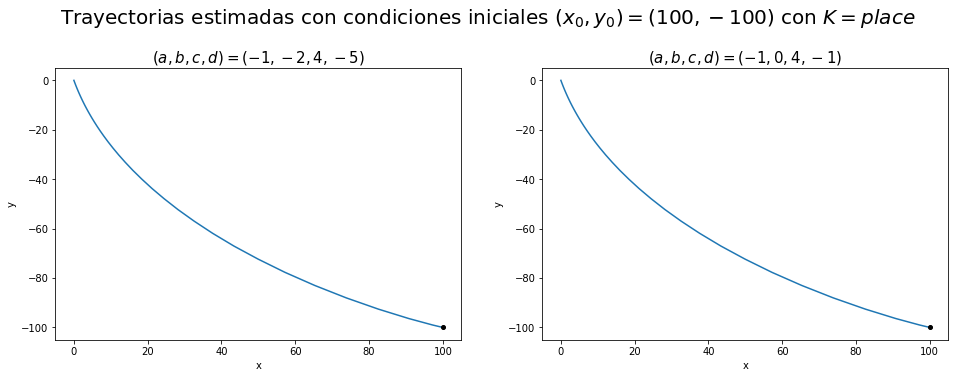

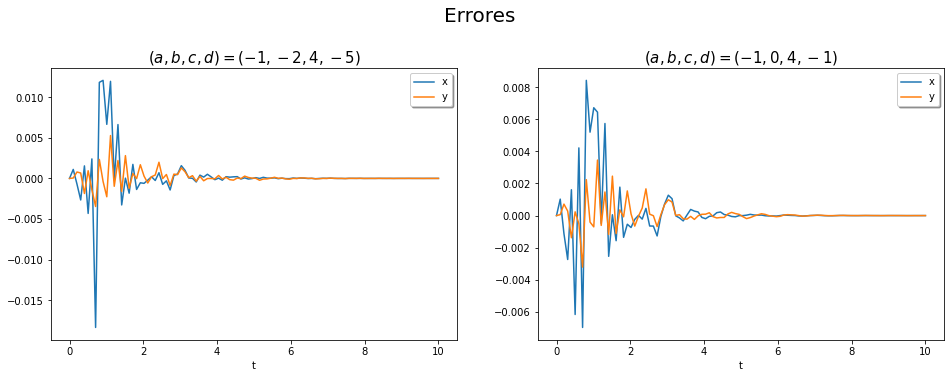

In [40]:
initial_condition = (100, 0, -100, 0)
solucion = get_trajectories_2(*initial_condition, K_place)
solucion_ = get_trajectories_4(*initial_condition, K_place, solucion)
plot_trajectories_4(*initial_condition, solucion_)
plot_error2(solucion, solucion_)

Podemos notar que para la primera elección de controles (constante, feedback, sinusoidal, bang-bang) el sistema no era estable, por lo que la aproximación no es muy buena y el error no converge a 0, mientras que para los controles del segundo tipo (feedback regulador) vemos que el error converge a 0 bastante rápido, por lo que se obtiene una buena aproximación.

## Ejercicio 9

Despejemos $\hat{\vec X}'(t)$ en función de $\hat{\vec X}(t)$ y $\vec e(t)$.

$$\begin{align}
\hat{\vec X}'(t)&=\tilde A(t)\hat{\vec X}(t)+B\vec U(t)+L(\vec Y(t)-C\hat{\vec X}(t)) \\
&=  \tilde A(t)\hat{\vec X}(t) - BK\vec X(t)+ LC(\vec X(t)-\hat{\vec X}(t))\\
& = \tilde A(t)\hat{\vec X}(t) - BK\vec e(t) - BK\hat{\vec X}(t) + LC\vec e(t)\\
& = (A-BK)\hat{\vec X}(t)+(LC-BK)\vec e(t)\\
\vec e'(t)&=(A-LC)\vec e(t)
\end{align}$$

donde $\vec e(t)=\vec X(t)-\hat{\vec X}(t)$. 

Con esto, la matriz $\hat A$ quedaría como:

$$\hat A=\left(\begin{array}{@{}c|c@{}}
  A-BK
  & LC-BK \\
\hline
  0 &
   A-LC
\end{array}\right)$$

Para encontrar matrices $K$ y $L$ tales que $A-BK$ y $A-LC$ sean estables utilizaremos la función lqr

In [41]:
K_lqr = []

sys = StateSpace(A_tilde[0], B, C, np.zeros((2,2)))
Q = np.eye(A_tilde[0].shape[0])
R = np.eye(B.shape[1])
K, S, E = lqr(sys, Q, R)
K_lqr.append(K)

sys = StateSpace(A_tilde[1], B, C, np.zeros((2,2)))
Q = np.eye(A_tilde[1].shape[0])
R = np.eye(B.shape[1])
K, S, E = lqr(sys, Q, R)
K_lqr.append(K)

K_lqr

[array([[ 2.24340784,  2.28940021, -3.01027767, -0.49544159],
        [ 1.26498527, -0.49544159,  0.38324614,  1.23330042]]),
 array([[ 2.83751278,  2.53944595, -0.40326128,  0.47564675],
        [ 2.19071958,  0.47564675,  0.35550003,  1.21850738]])]

In [42]:
L_lqr = []

sys = StateSpace(A_tilde[0].T, C.T, B.T, np.zeros((2,2)))
Q = np.eye(A_tilde[0].shape[0])
R = np.eye(B.shape[1])
L, S, E = lqr(sys, Q, R)
L_lqr.append(L.T)

sys = StateSpace(A_tilde[1].T, C.T, B.T, np.zeros((2,2)))
Q = np.eye(A_tilde[1].shape[0])
R = np.eye(B.shape[1])
L, S, E = lqr(sys, Q, R)
L_lqr.append(L.T)

L_lqr

[array([[ 1.68182698,  0.71970487],
        [ 1.17325854, -0.86997907],
        [ 0.71970487,  1.84087365],
        [ 3.40528387,  1.45339544]]),
 array([[ 1.21850738,  0.47564675],
        [ 0.35550003, -0.40326128],
        [ 0.47564675,  2.53944595],
        [ 2.19071958,  2.83751278]])]

Como $\hat A$ es triangular superior por bloques, entonces $\det(\hat A)=\det(A-BK)\cdot\det(A-LC)$, luego los valores propios de $\hat A$ tienen parte real negativa si cada matriz $A-BK$ y $A-LC$ tienes valores propios con parte real negativa. Por lo tanto, $\hat A$ es Hurwitz ($\hat A$ es estable) si $A-BK$ y $A-LC$ lo son.

In [43]:
A_ = []
for i in range(2):
    A_.append(np.block([[A_tilde[i] - B @ K_lqr[i], L_lqr[i] @ C - B @ K_lqr[i]],
                        [np.zeros(((A_tilde[i] + L_lqr[i] @ C).shape[0], (A_tilde[i] - B @ K_lqr[i]).shape[1])), A_tilde[i] - L_lqr[i] @ C]]))
    
A_[0]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  1.68182698,
         0.        ,  0.71970487,  0.        ],
       [-3.24340784, -2.28940021,  1.01027767,  0.49544159, -1.0701493 ,
        -2.28940021,  2.1402986 ,  0.49544159],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.71970487,
         0.        ,  1.84087365,  0.        ],
       [ 2.73501473,  0.49544159, -5.38324614, -1.23330042,  2.1402986 ,
         0.49544159,  1.0701493 , -1.23330042],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.68182698,
         1.        , -0.71970487,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -2.17325854,
         0.        , -1.13002093,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.71970487,
         0.        , -1.84087365,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.59471613,
         0.        , -6.45339544,  0.        ]])

In [77]:
def get_trajectories_5(x1_0, x2_0, x3_0, x4_0):
    solucion = {}

    def sistema1(t, x):
        return A_[0]@x
                
    def sistema2(t, x):
        return A_[1]@x

    #Resolvemos con solve_ivp para cada caso partiendo del mismo punto inicial
    sol1 = solve_ivp(fun = sistema1, 
                    t_span = intervalo, 
                    y0 = [x1_0, x2_0, x3_0, x4_0,
                         10000, 1, 10000, 1],
                    dense_output = True)
    sol2 = solve_ivp(fun = sistema2, 
                    t_span = intervalo, 
                    y0 = [x1_0, x2_0, x3_0, x4_0,
                         10000, 1, 10000, 1],
                    dense_output = True)
    #Guardamos el resultado
    solucion = [sol1, sol2]
    return solucion

def plot_trajectories_5(x1_0, x2_0, x3_0, x4_0, solucion):
    t = np.linspace(0,10,100)
    for i in range(2):
        fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(16,5))
        fig.suptitle(f'Resultados para $(a,b,c,d)=({a[i]},{b[i]},{c[i]},{d[i]})$ con $(x_0, y_0)=({x1_0},{x3_0})$', fontsize=20, y = 1.05)
        t = np.linspace(0,10,100)
        axs[0].set_title('$\hat X$', fontsize=15)
        axs[0].set_xlabel('x')
        axs[0].set_ylabel('y')
        axs[0].plot(solucion[i].sol(t)[0], solucion[i].sol(t)[2])
        axs[0].plot(x1_0, x3_0, marker="o", markersize=4, markeredgecolor="black", markerfacecolor="black")

        axs[1].set_title('$e$', fontsize=15)
        axs[1].set_xlabel('t')
        axs[1].plot(t, solucion[i].sol(t)[4], label='x')
        axs[1].plot(t, solucion[i].sol(t)[6], label='y')
        axs[1].legend(shadow=True)
        plt.show()

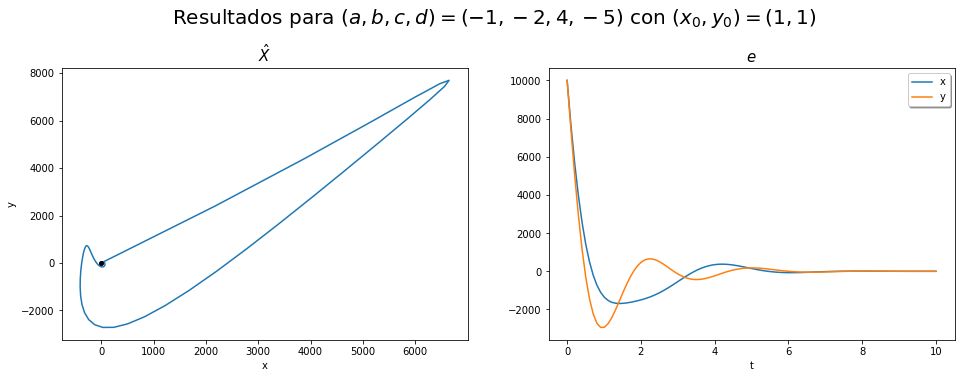

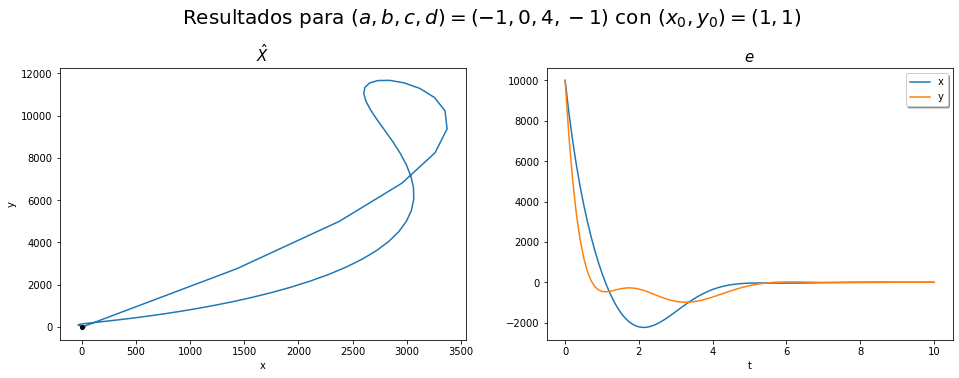

In [79]:
initial_condition = (1, 0, 1, 0)
solucion = get_trajectories_5(*initial_condition)
plot_trajectories_5(*initial_condition, solucion)

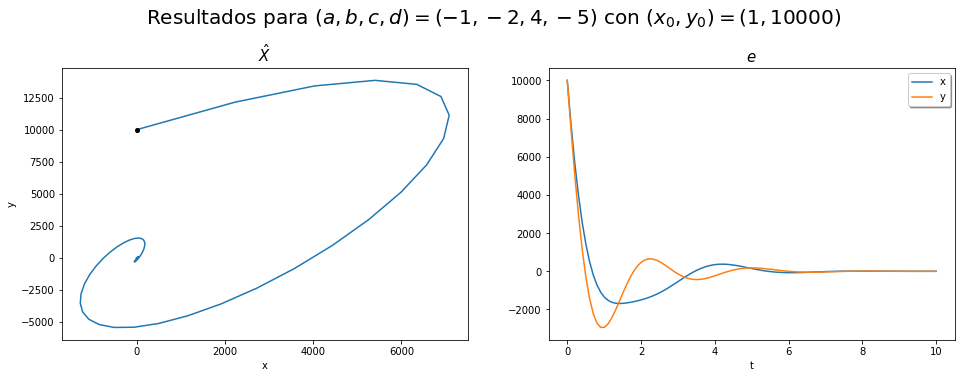

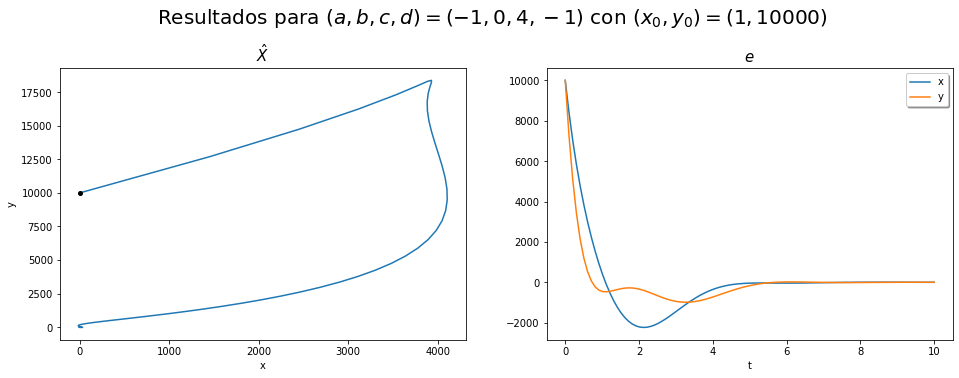

In [80]:
initial_condition = (1, 0, 10000, 0)
solucion = get_trajectories_5(*initial_condition)
plot_trajectories_5(*initial_condition, solucion)

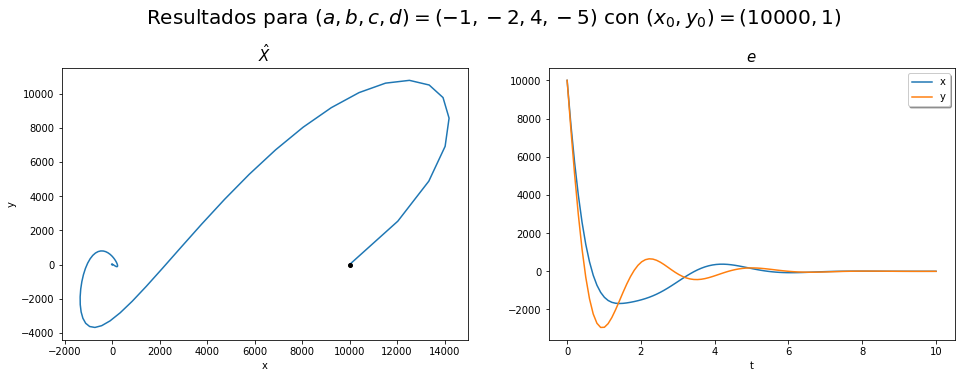

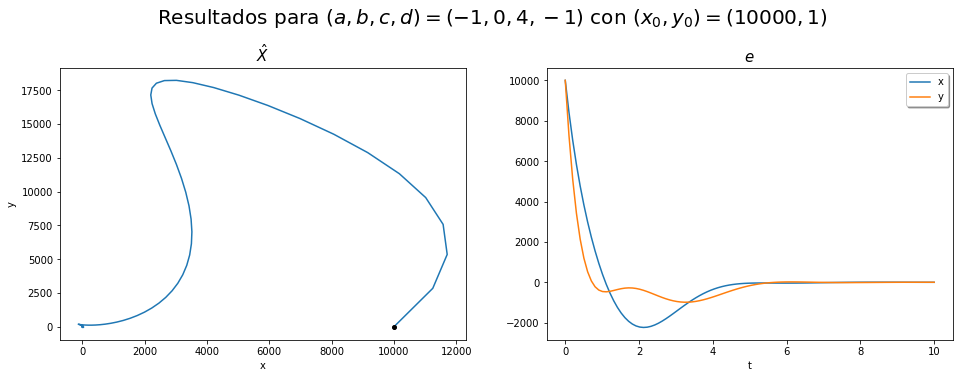

In [81]:
initial_condition = (10000, 0, 1, 0)
solucion = get_trajectories_5(*initial_condition)
plot_trajectories_5(*initial_condition, solucion)

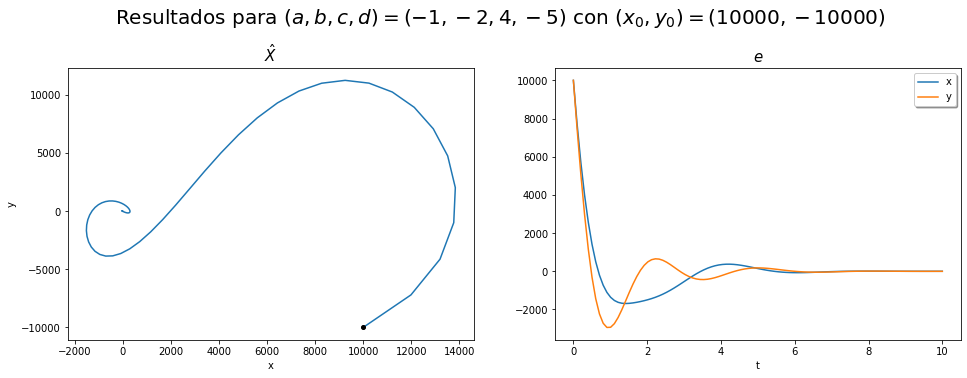

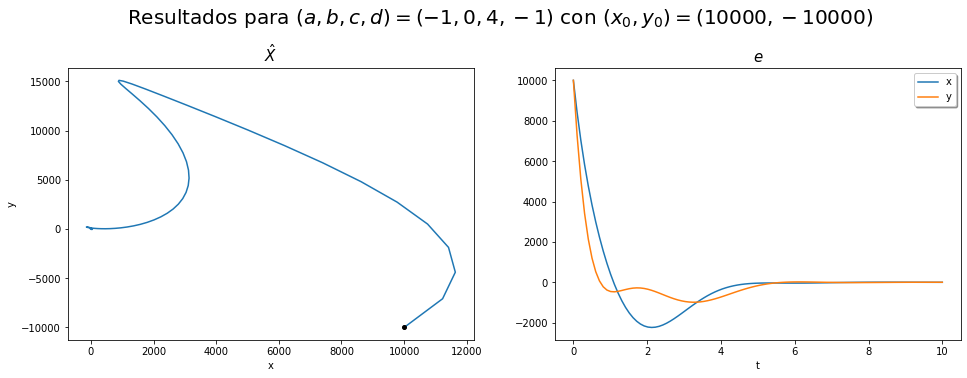

In [83]:
initial_condition = (10000, 0, -10000, 0)
solucion = get_trajectories_5(*initial_condition)
plot_trajectories_5(*initial_condition, solucion)

Finalmente, vemos que para este sistema que involucra $\hat{\vec X}$ y $\vec e$, el error converge suavemente a 0 en ambas componentes en todos los casos simulados.